# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cleaned_dataset.csv')
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

In [4]:
df.head(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [5]:
df.drop(['track_genre','key','mode','explicit','time_signature'],axis=1).describe()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,80418.000000,8.041800e+04,80418.000000,80418.000000,80418.000000,80418.000000,80418.000000,80418.000000,80418.000000,80418.000000,80418.000000
mean,34.681701,2.317442e+05,0.561713,0.637542,-8.523842,0.088682,0.326749,0.182417,0.218949,0.465508,122.481646
std,19.453003,1.150244e+05,0.175640,0.256646,5.207436,0.114958,0.338356,0.329693,0.197241,0.262605,29.689490
min,0.000000,1.580000e+04,0.051300,0.000020,-46.591000,0.022100,0.000000,0.000000,0.009250,0.000000,30.200000
25%,21.000000,1.742932e+05,0.449000,0.459000,-10.375000,0.036100,0.015700,0.000000,0.098400,0.244000,99.866000
50%,35.000000,2.154930e+05,0.575000,0.680000,-7.231000,0.049200,0.187000,0.000085,0.133000,0.451000,122.203500
75%,49.000000,2.674952e+05,0.691000,0.857000,-5.128000,0.087100,0.623000,0.141000,0.282000,0.678000,140.237750
max,100.000000,5.237295e+06,0.985000,1.000000,4.532000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000


### Plot correlation heatmap

In [5]:
df.drop(['track_genre','key','mode','explicit','time_signature'],axis=1).corr()

,popularity,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
popularity,1.000000,-0.055623,0.086538,-0.001812,0.091850,-0.063228,-0.030212,-0.175712,-0.028292,0.010128,0.002012
duration_ms,-0.055623,1.000000,-0.066229,0.057909,-0.003685,-0.063007,-0.106162,0.115357,0.008832,-0.146564,0.020561
danceability,0.086538,-0.066229,1.000000,0.120063,0.247496,0.106329,-0.162282,-0.179704,-0.128545,0.484445,-0.043791
energy,-0.001812,0.057909,0.120063,1.000000,0.761855,0.138560,-0.732104,-0.180489,0.195741,0.247678,0.250031
loudness,0.091850,-0.003685,0.247496,0.761855,1.000000,0.053917,-0.581658,-0.430496,0.087001,0.280699,0.218960
speechiness,-0.063228,-0.063007,0.106329,0.138560,0.053917,1.000000,0.008943,-0.104286,0.227145,0.033123,-0.006364
acousticness,-0.030212,-0.106162,-0.162282,-0.732104,-0.581658,0.008943,1.000000,0.091040,-0.018135,-0.096829,-0.220920
instrumentalness,-0.175712,0.115357,-0.179704,-0.180489,-0.430496,-0.104286,0.091040,1.000000,-0.100997,-0.327447,-0.048384
liveness,-0.028292,0.008832,-0.128545,0.195741,0.087001,0.227145,-0.018135,-0.100997,1.000000,0.019023,0.000341
valence,0.010128,-0.146564,0.484445,0.247678,0.280699,0.033123,-0.096829,-0.327447,0.019023,1.000000,0.079498


<Axes: >

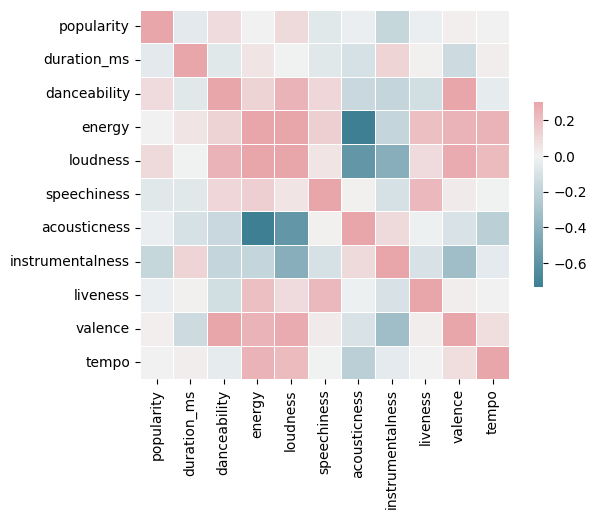

In [6]:
cmap = sns.diverging_palette(220,10, as_cmap =True)
sns.heatmap(df.drop(['track_genre','key','mode','explicit','time_signature'],axis=1).corr(), vmax=.3,center=0,square = True, linewidths = .5,cbar_kws={"shrink":.5},cmap = cmap)

### Plot distribution of continuous variables

In [7]:
def plot_continuous_distribution(df, cols):
    fig, axes = plt.subplots(nrows=len(cols)//3 + len(cols)%3, ncols=3, figsize=(12, 12))
    axes = axes.flatten()
    for i, col in enumerate(cols):
        sns.histplot(df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
    for i in range(len(cols), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.savefig("dist.png")
    plt.show()

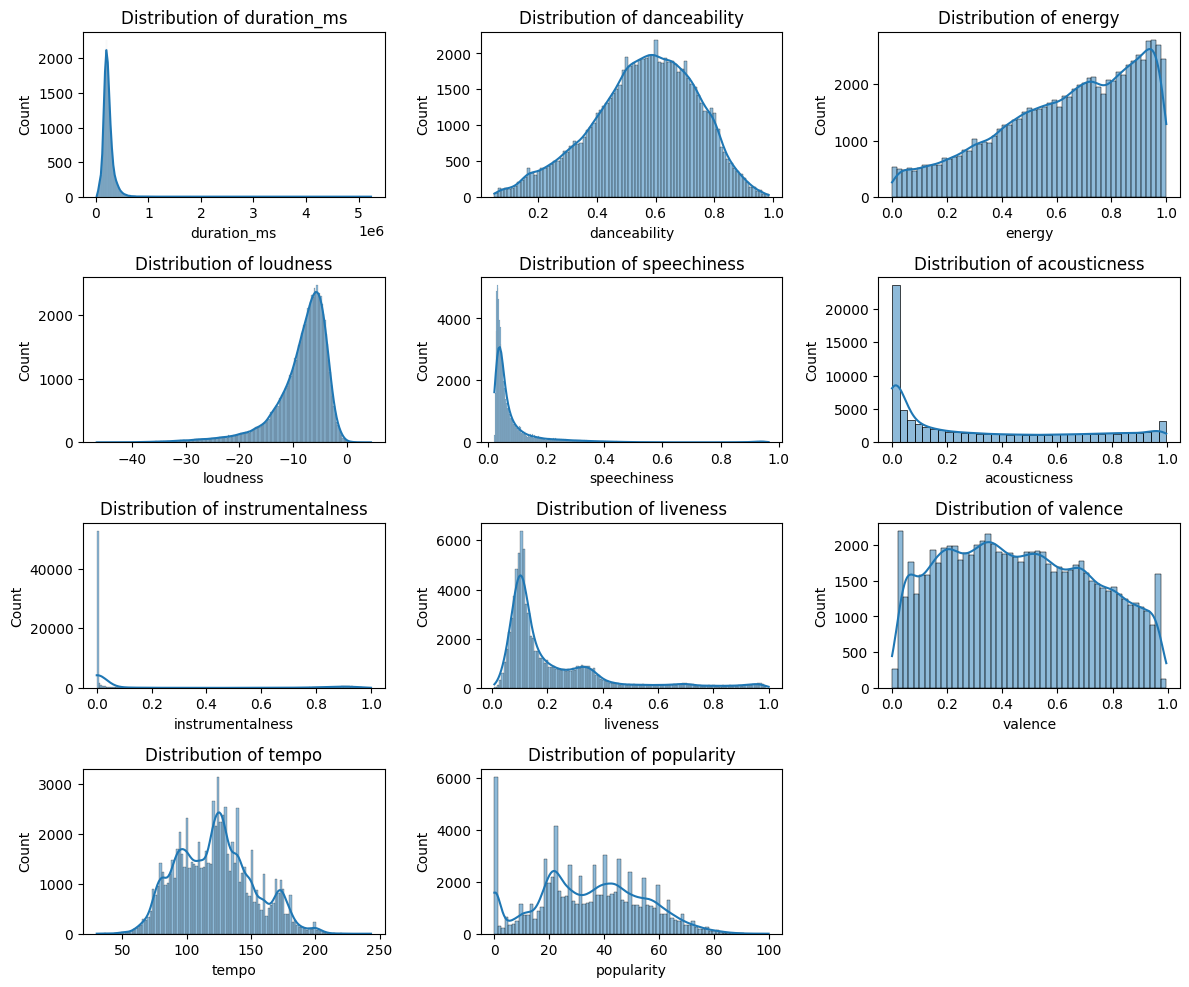

In [8]:
cont_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo','popularity']
plot_continuous_distribution(df,cont_features)

### Plot barchart for categorical features

In [25]:
def plot_cat_barcharts(df, cat_features):
    fig, axes = plt.subplots(nrows=len(cat_features)//3 + len(cat_features)%3, ncols=3, figsize=(15, 15))
    axes = axes.flatten()
    for i, cat_feature in enumerate(cat_features):
        if cat_feature == 'track_genre':
            top_30_genres = df[cat_feature].value_counts().nlargest(30).index
            sns.countplot(x=cat_feature, data=df[df[cat_feature].isin(top_30_genres)], order=top_30_genres, ax=axes[i])
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
            axes[i].set_title(f"Top 30 {cat_feature.capitalize()} Counts")
        else:
            sns.countplot(x=cat_feature, data=df, order=df[cat_feature].value_counts().index, ax=axes[i])
            axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=90)
            axes[i].set_title(f"{cat_feature.capitalize()} Counts")
    for i in range(len(cat_features), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.savefig('dist2.png')
    plt.show()

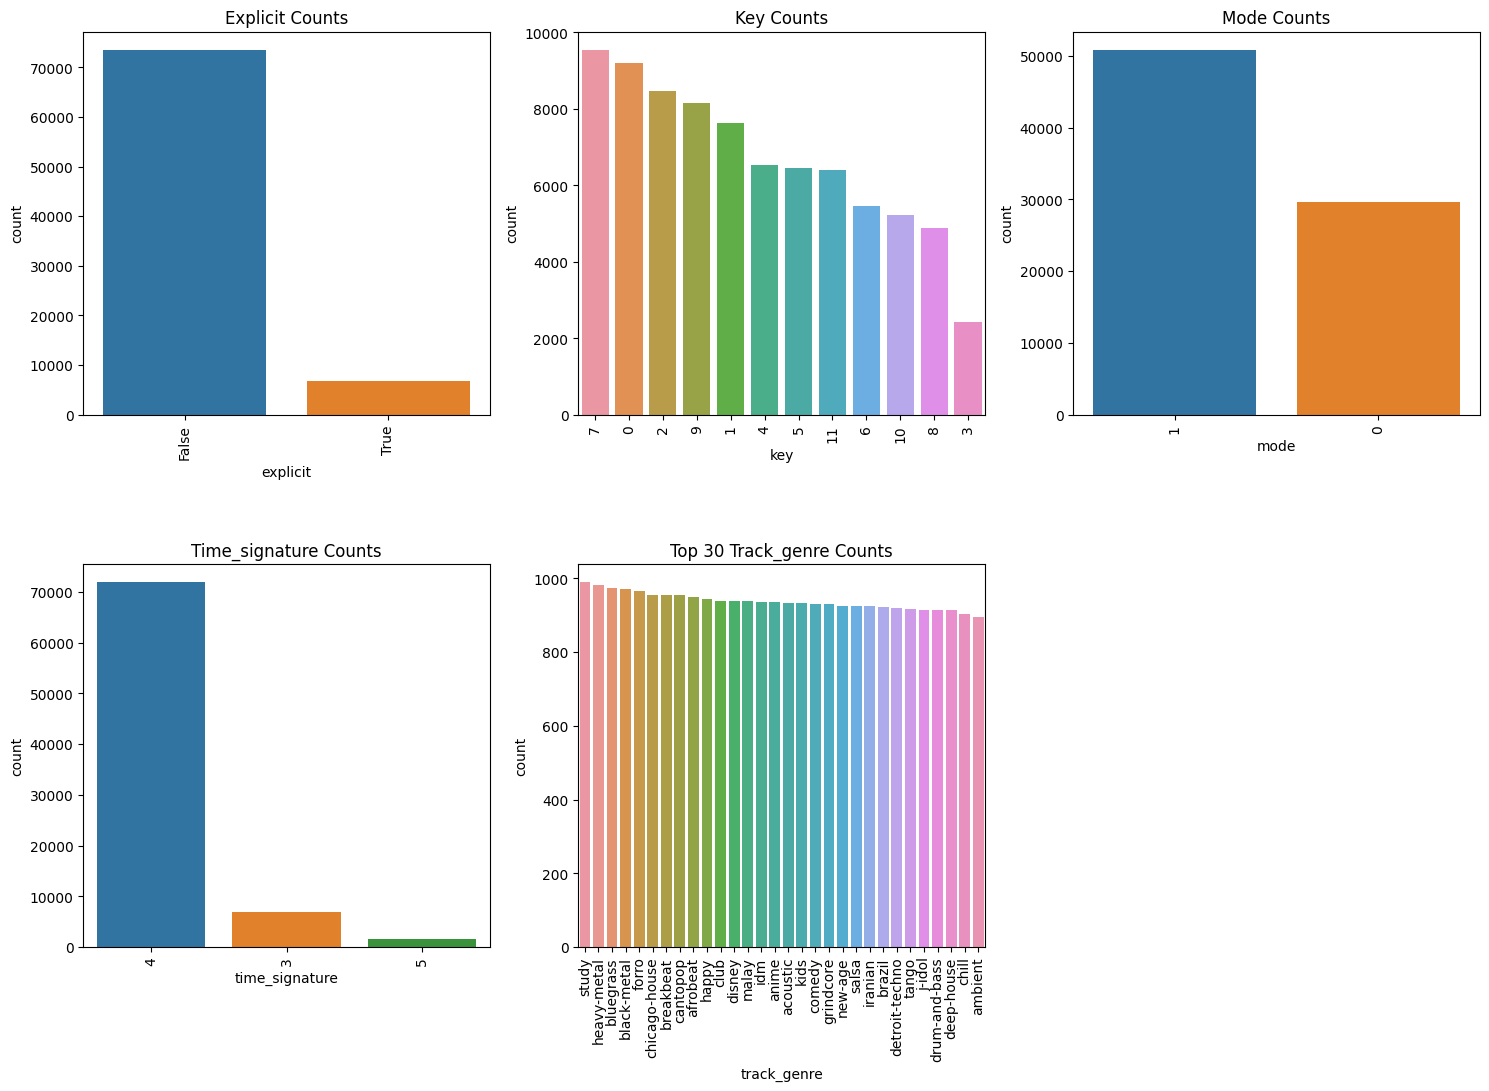

In [26]:
cat_features = ['explicit','key','mode','time_signature', 'track_genre']
plot_cat_barcharts(df,cat_features)

### Scatter plot of continuous features vs popularity

In [9]:
def plot_scatter(df, cont_features):
    fig, axes = plt.subplots(nrows=len(cont_features)//4 + len(cont_features)%4, ncols=4, figsize=(15, 15))
    axes = axes.flatten()
    for i, feature in enumerate(cont_features):
        axes[i].scatter(df[feature], df['popularity'])
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('popularity')
    for i in range(len(cont_features), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.savefig('scatter.png')
    plt.show()

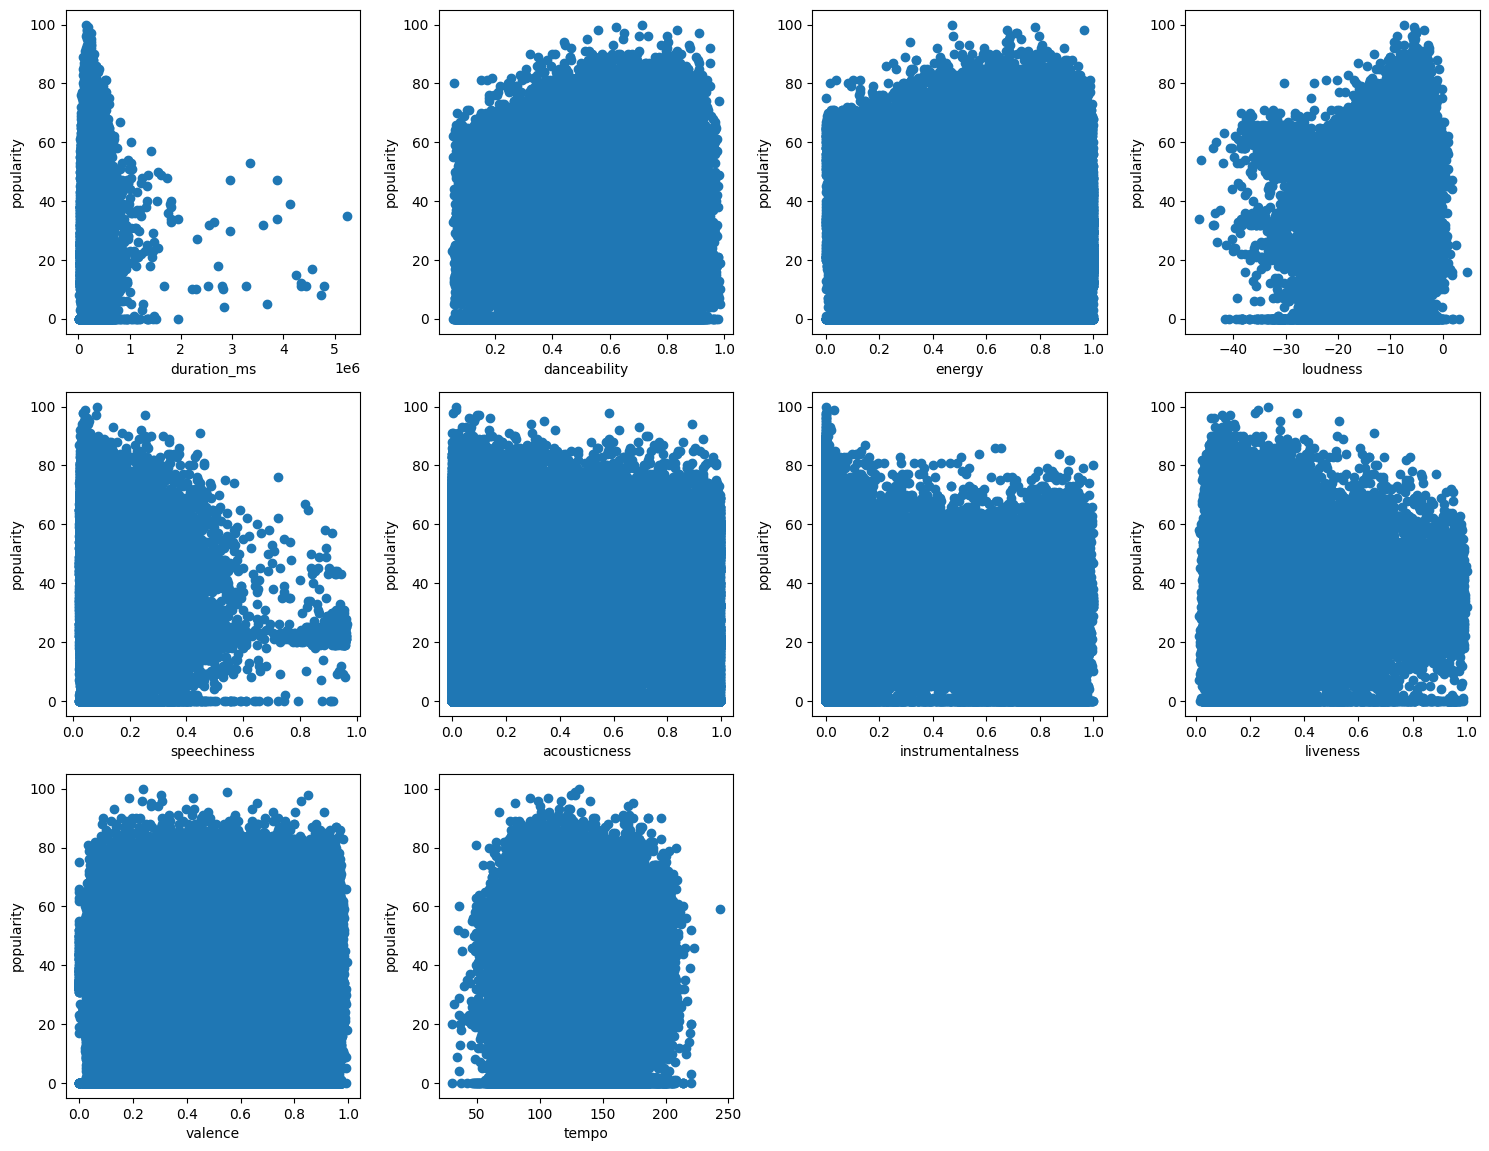

In [10]:
cont_features = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
plot_scatter(df, cont_features)

### Box plot for categorical features vs popularity

In [32]:
def plot_box_cat(df, cat_features):
    fig, axes = plt.subplots(nrows=len(cat_features)//3 + len(cat_features)%3, ncols=3, figsize=(15, 15))
    axes = axes.flatten()
    for i, col in enumerate(cat_features):
        if col == 'track_genre':
            N = 10  # number of top genres to include
            # calculate the average popularity for each genre
            genre_popularity = df.groupby('track_genre')['popularity'].mean()
            # get the top N genres by average popularity
            top_genres = genre_popularity.nlargest(N).index
            df_top_genres = df[df['track_genre'].isin(top_genres)]
            sns.boxplot(x=col, y='popularity', data=df_top_genres, ax=axes[i])
        else:
            sns.boxplot(x=col, y='popularity', data=df, ax=axes[i])
        axes[i].set_title(f"{col.capitalize()} vs {'popularity'.capitalize()}")
    for i in range(len(cat_features), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.savefig('box.png')
    plt.show()

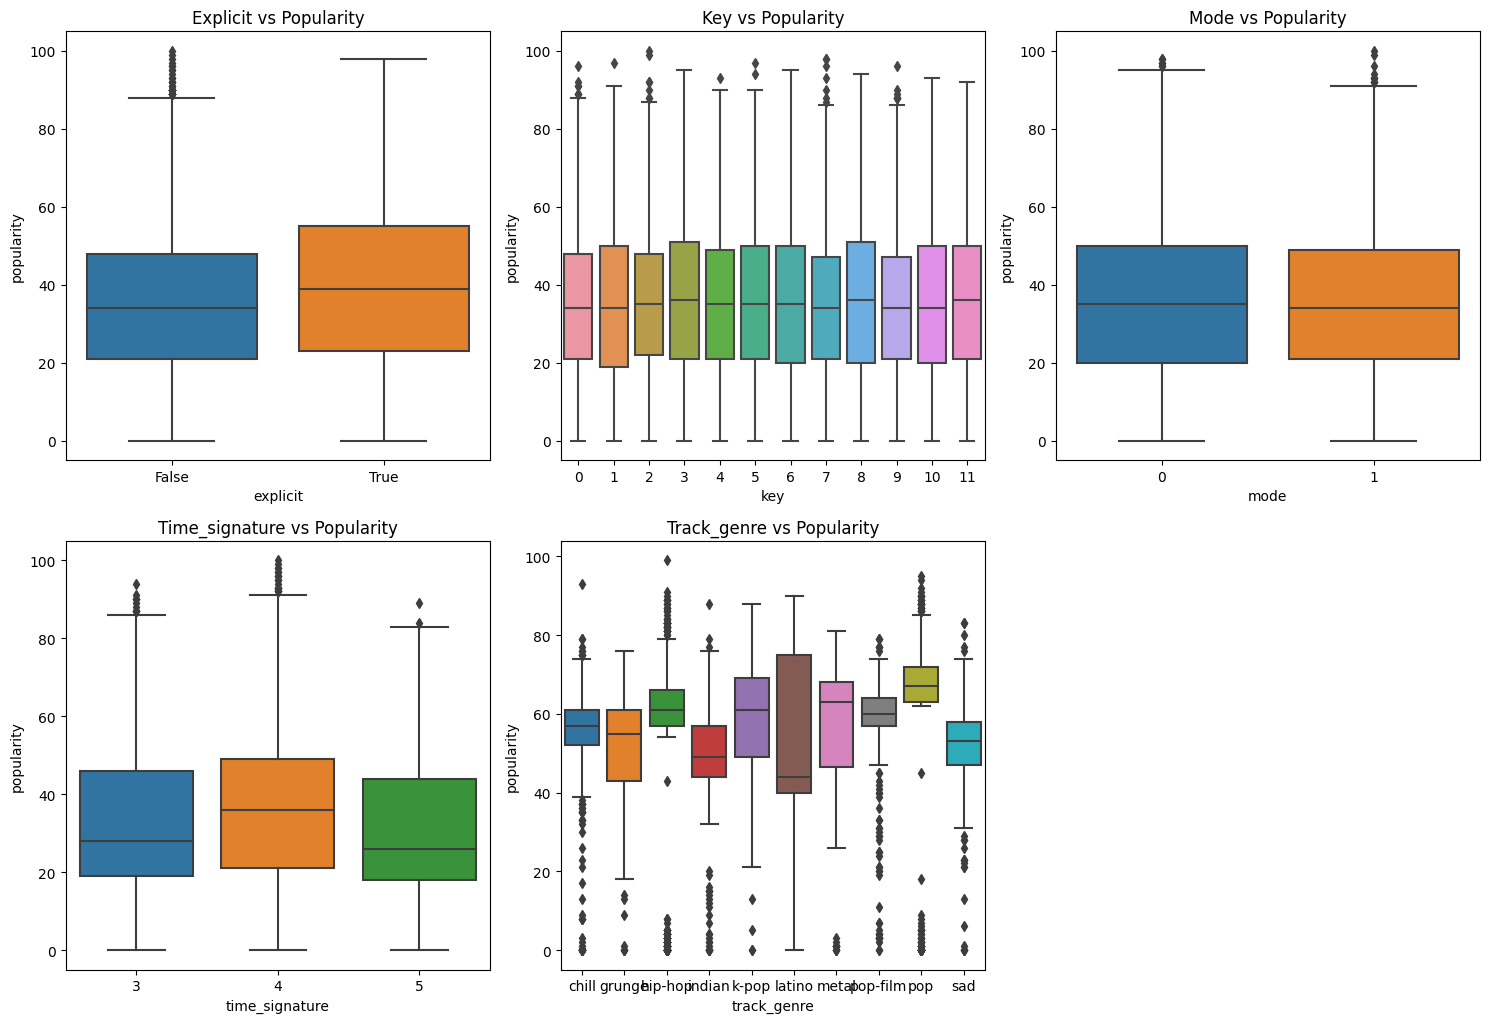

In [34]:
cat_features = ['explicit','key','mode','time_signature', 'track_genre']


# filter the data to include only rows with a genre in the top N genres
plot_box_cat(df, cat_features)


### Create a popularity flag where popularity > 3rd quantile

In [35]:
popularity_threshold = df['popularity'].quantile(0.75)
df['popularity_flag'] = (df['popularity'] > popularity_threshold).astype(int)

In [36]:
df.head(10)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_flag
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,1
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,1
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1
5,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic,1
6,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic,1
7,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic,1
8,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic,1
9,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic,1


### Check for data imbalance using ratio of popular songs to non-popular songs

In [37]:
num_pop = sum(df['popularity_flag'] == 1)

# Calculate the number of non-popular songs
num_non_pop = sum(df['popularity_flag'] == 0)


ratio = num_pop / num_non_pop
print(f'The ratio of popular to non-popular songs is {ratio:.2f}.')


The ratio of popular to non-popular songs is 0.32.


### Box plot of popularity flag vs continuous features

In [15]:
def plot_data(df):
    continuous_columns = ['duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']
    for column in continuous_columns:
        sns.boxplot(x='popularity_flag', y=column, data=df)
        plt.xlabel('popularity_flag')
        plt.ylabel(column)
        plt.title(f'popularity_flag vs {column}')
        plt.show()

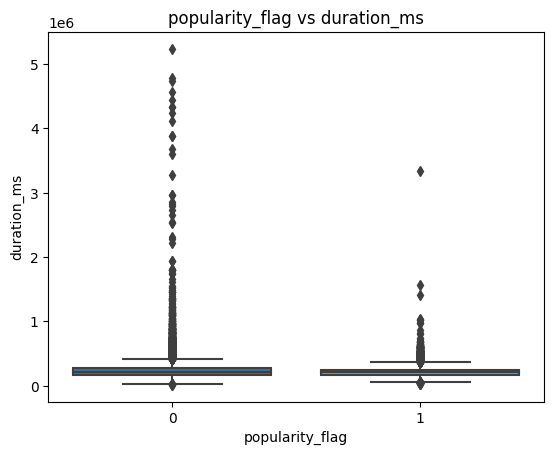

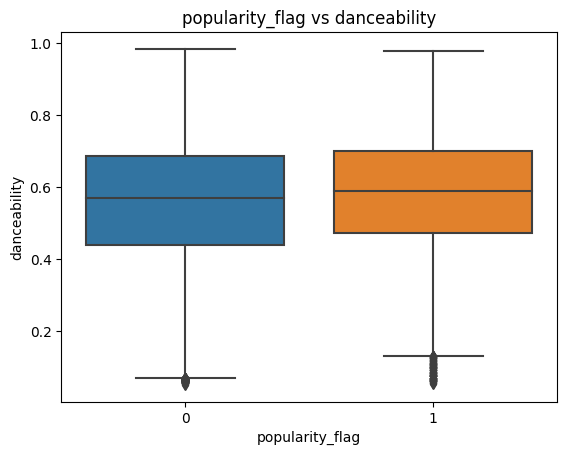

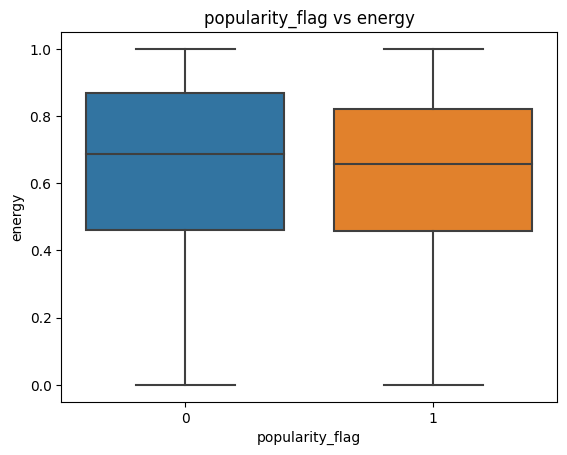

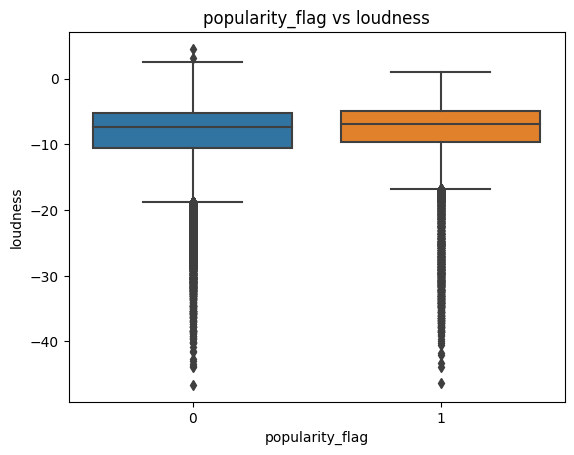

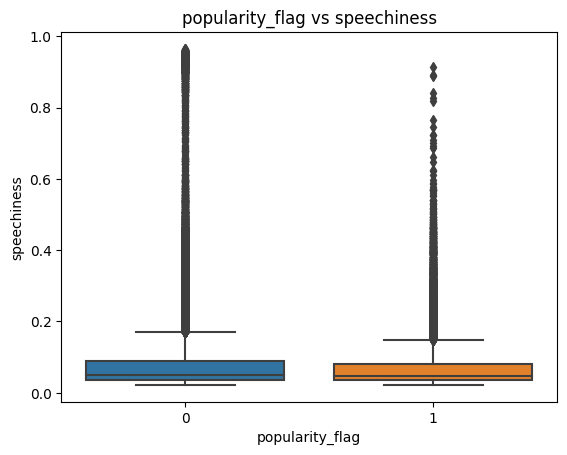

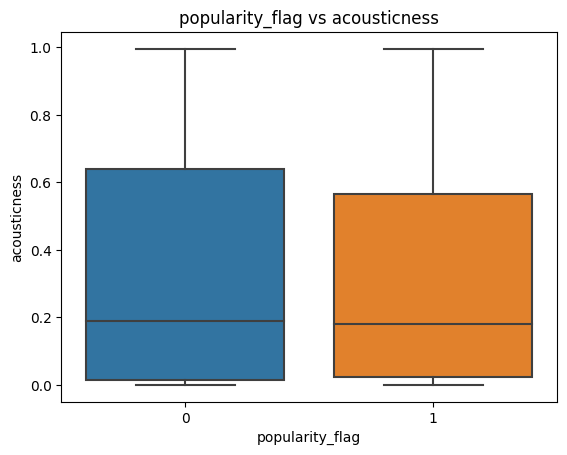

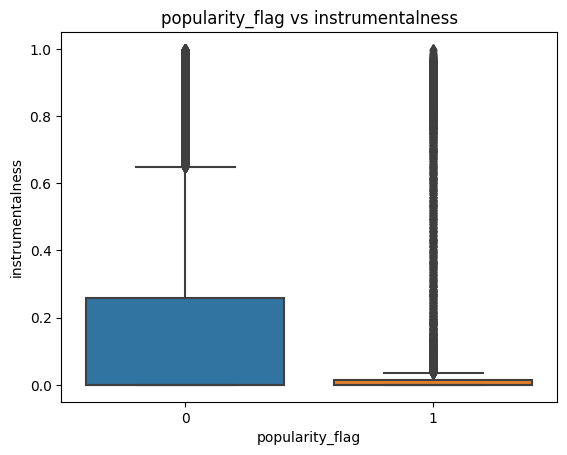

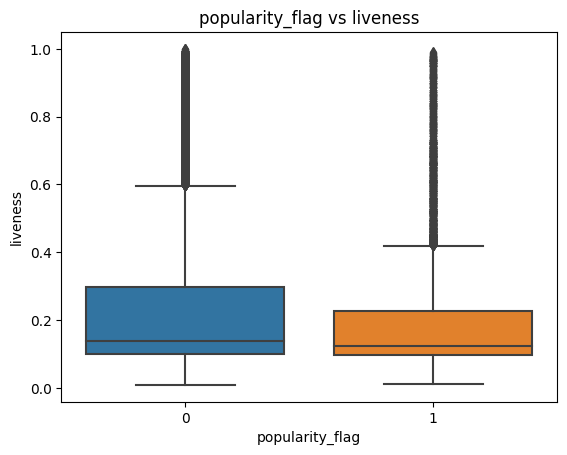

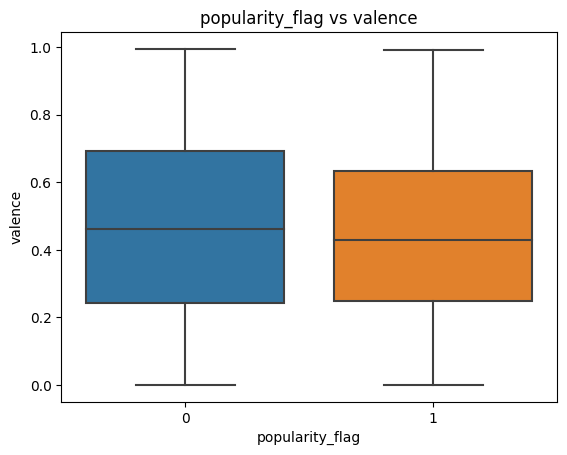

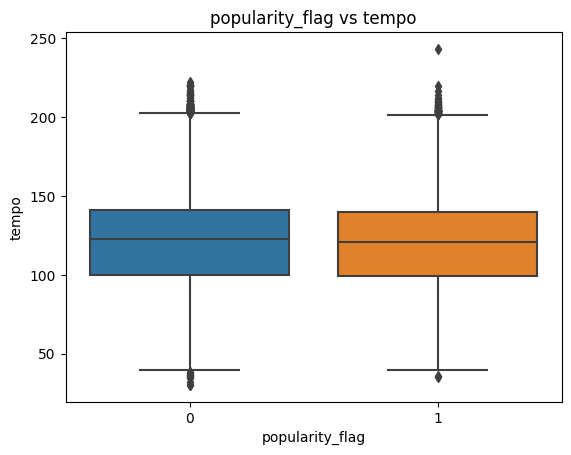

In [16]:
plot_data(df)

### Plot conditional distribution of categorical columns vs popularity flag

In [38]:
def plot_conditional_distribution(df, cat_columns):
    fig, axes = plt.subplots(nrows=len(cat_columns)//3 + len(cat_columns)%3, ncols=3, figsize=(15, 15))
    axes = axes.flatten()
    for i, cat_col in enumerate(cat_columns):
        if cat_col == 'track_genre':
            top_10_genres = df[cat_col].value_counts().nlargest(50).index
            df_grouped = df[df[cat_col].isin(top_10_genres)].groupby(cat_col)['popularity_flag'].value_counts(normalize=True).unstack()
        else:
            df_grouped = df.groupby(cat_col)['popularity_flag'].value_counts(normalize=True).unstack()
        df_grouped.plot(kind='bar', stacked=True, ax=axes[i])
        axes[i].set_xlabel(cat_col)
        axes[i].set_ylabel('Proportion')
        axes[i].set_title(f'Conditional Distribution of popularity_flag by {cat_col}')
    for i in range(len(cat_columns), len(axes)):
        fig.delaxes(axes[i])
    plt.tight_layout()
    plt.savefig('condist')
    plt.show()

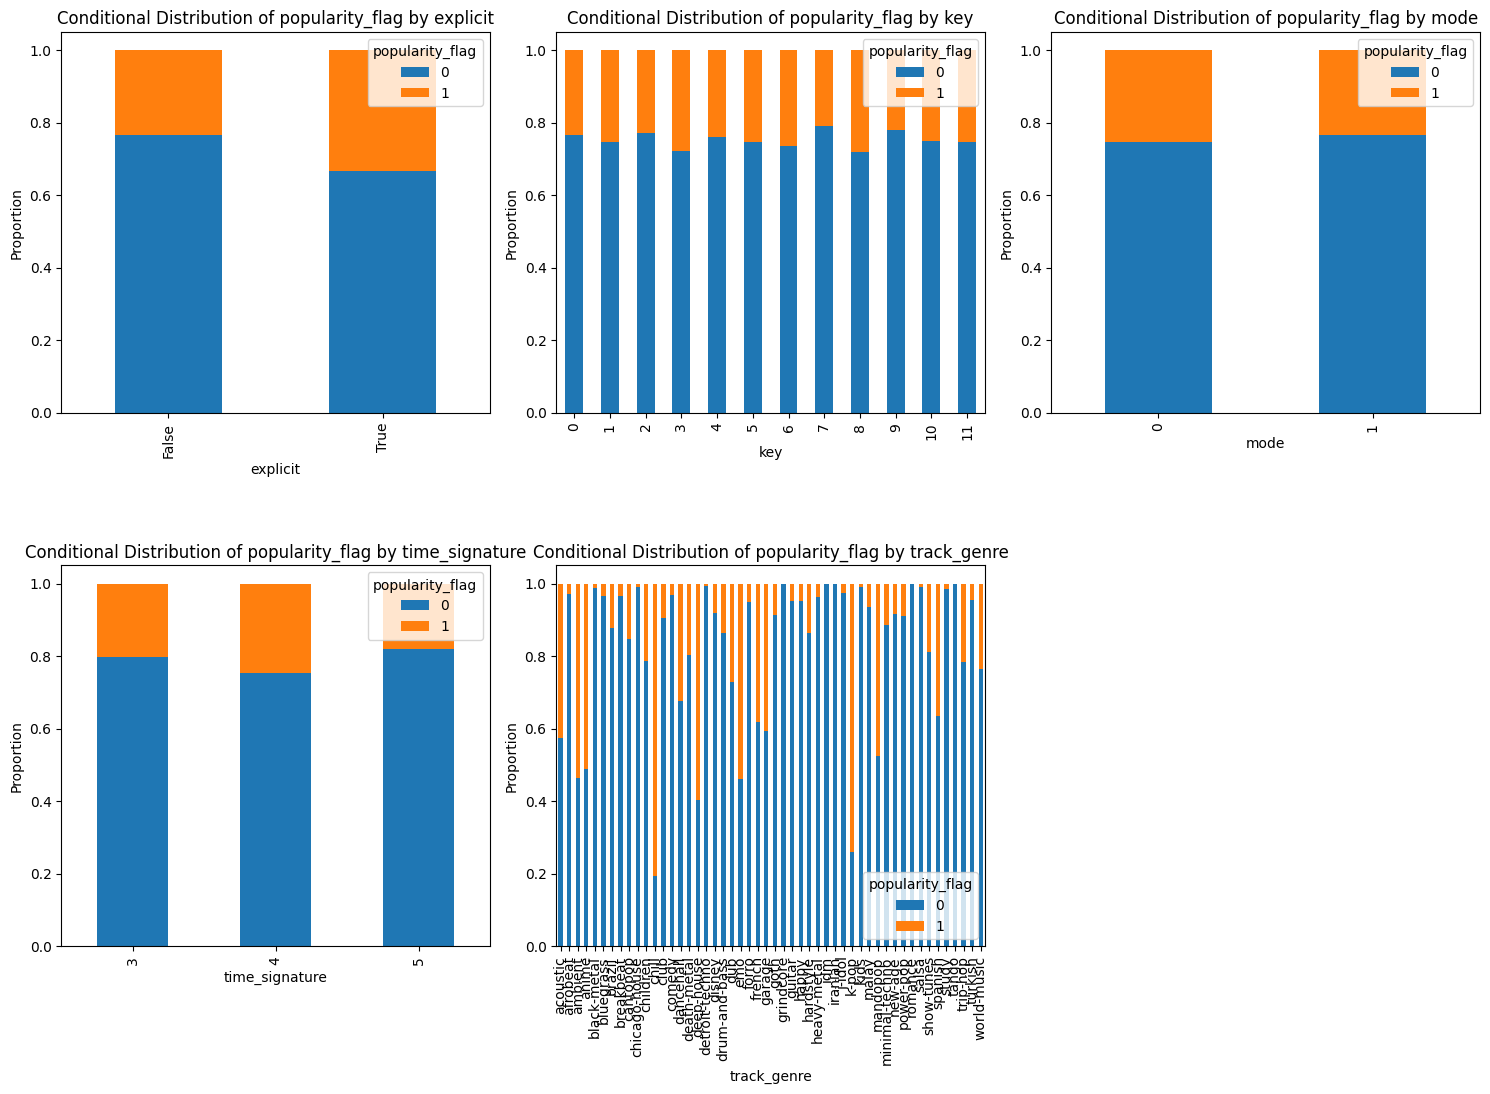

In [39]:
cat_features = ['explicit','key','mode','time_signature','track_genre']

plot_conditional_distribution(df,cat_features)